# Problem 1

## a

In [4]:
import mayavi.mlab as mlab
import pandas as pd
import scipy.sparse as sp
import numpy as np

def solve_linear_poisson(N):
    # N = 100
    xx = np.linspace(0,2*np.pi,N)
    dx = xx[1]-xx[0]
    dy = xx[1]-xx[0]
    data = list()
    row_ind = list()
    col_ind = list()
    x_list = list()
    y_list = list()
    # i mod 100 for i, j // 100 for j
    u = lambda x,y : np.sin(2*y)*np.cos(2*x)
    f = np.zeros(N*N)
    for n in range(N*N):
        i = n % N
        j = n // N
        f[n] = -8*np.sin(2*xx[j]) * np.cos(2*xx[i])
        x_list.append(i*dx)
        y_list.append(j*dy)
        if i == 0 or i == (N-1)  or j == 0 or j == N-1:
            data.append(1)
            row_ind.append(n)
            col_ind.append(n)
            f[n] = np.sin(2*xx[j]) * np.cos(2*xx[i])

        else:
            for ii,jj,kk in zip([1,-4,1,1,1], [n-1,n,n+1,n,n], [n-1,n,n+1,n-N,n+N]):
                data.append(ii/(dx**2))
                row_ind.append(n)
                col_ind.append(kk)

    sparse_matrix = sp.csr_matrix((data,(row_ind,col_ind)),shape=(N*N,N*N))

    u_n = sp.linalg.spsolve(sparse_matrix,f)
    xx = np.linspace(0,np.pi*2,N)
    x_vals, y_vals = np.mgrid[0:2*np.pi:1j*N, 0:np.pi*2:1j*N]
    x_vals, y_vals = np.array(x_list).reshape(N,N), np.array(y_list).reshape(N,N)

    u_vals = np.array(u_n)
    # print(u_vals.size,x_vals.size)
    u_vals.resize(x_vals.shape)
    v_vals = u(x_vals, y_vals)
    return x_vals, y_vals, u_vals, v_vals
x,y,u,v = solve_linear_poisson(500)

In [5]:
import numpy as np
from scipy.io import savemat

# Create some NumPy arrays
X1 = x
X2 = y
U =  u
V = v

# Dictionary to hold data
data = {
    'X1': X1,  # Save x array
    'X2': X2,  # Save y array
    'U': U,   # Save z array
    'V' : V
}

# Save the data to a MATLAB .mat file
savemat('C:\\Users\\andyh\\Documents\\Projects\\matlab_environments\\3d_graph.mat', data)  # 'data.mat' is the filename

In [6]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
u = lambda x : np.sin(x)

nn = [int(2**(i/3)) + 1 for i in range(10,25)]
for i,n in enumerate(nn):
    xx = np.linspace(0,5,n)
    actual_u = u(xx)
    x,y,un,actual = solve_linear_poisson(n) 
    # f_x = compute_numerical_second_derivative(xx,fx)
    diff = un.flatten() - actual.flatten()
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(actual)))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(actual_u))


slope p2 = -2.0475087829776877, slope pinf = -2.0452860786265514


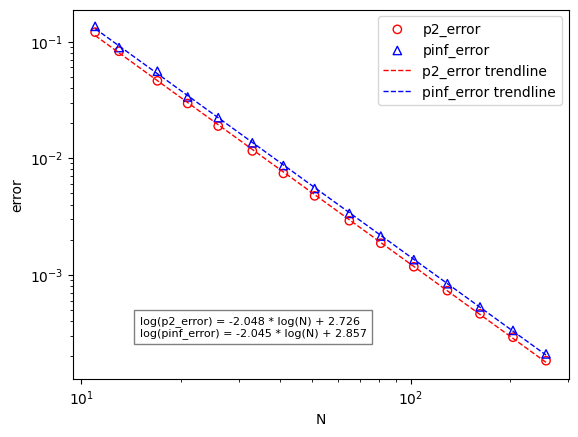

In [7]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error",marker='^')

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(15, .0003, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()

# Problem 2

## a

0.06346651825433926

In [209]:
## Constructing Gaussian matrix

theta = np.linspace(0,2*np.pi, 10)[:-1]
print(theta)
xib = np.pi * np.cos(theta)
yib = np.pi * np.sin(theta)
N = 300
xx = np.linspace(0,2*np.pi,N)
yy = np.linspace(0,2*np.pi,N)

dx = xx[1]-xx[0]

X, Y = np.meshgrid(xx, yy)

Xint, Yint = np.meshgrid(xx[1:-1], yy[1:-1])

# for i in range(N*N):
#     i = n % N
#     j = n // N



[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361]


In [210]:
import numpy as np
import scipy as sc
def spreadQ(X, Y, xq, yq, delta):
    Nq = len(xq)
    Sib = np.zeros((Nq, len(X)*len(X)))
    for k in range(Nq):
        Rk = np.sqrt((X - xq[k])**2 + (Y - yq[k])**2)
        rshp = (delta(Rk).reshape(-1,1))
        reshaped_delta =  delta(Rk).flatten()
        Sib[k,:] = reshaped_delta
    return np.transpose(Sib)
    


def interpPhi(X, Y, xq, yq, Phi, delta):
    Jphi = np.zeros_like(xq)
    Nq = len(xq)
    dx = X[0, 1] - X[0, 0]
    dy = Y[1, 0] - Y[0, 0]
    
    for k in range(Nq):
        Rk = np.sqrt((X - xq[k])**2 + (Y - yq[k])**2)
        # Jphi[k] = dx * dy * np.sum(Phi * delta(Rk))
        Jphi[k] = dx * dy * np.sum(Phi * delta(Rk))
    return Jphi


In [219]:
from scipy.sparse import spdiags, kron, eye
from scipy.sparse.linalg import splu
import jax
e = (1 / dx**2) * np.ones(N)

# Create the second derivative matrix D2 using spdiags
D2 = spdiags([e, -2 * e, e], [-1, 0, 1], N, N)

# Create the identity matrix I_n
I_n = eye(N)

# Define the 2D Laplacian using Kronecker products
Lap = kron(I_n, D2) + kron(D2, I_n)

# Perform LU decomposition (equivalent of MATLAB's decomposition)
dLap = splu(Lap)  # 'splu' is used for sparse LU decomposition in scipy

# Define the Gaussian function delta_a and delta
def delta_a(r, a):
    return (1 / (2 * np.pi * a**2)) * np.exp(-0.5 * (r / a)**2)
def delta(r):
    return delta_a(r, 1.2 * dx)

u = np.concatenate(((np.cos(2*X)*np.sin(2*Y)).flatten(), 0*xib))
f = np.concatenate(((-8*np.sin(2*Y) * np.cos(2*X)).flatten() ,np.cos(2*xib) * np.sin(2*yib)))
print(f.dtype)
def gmres_helper(v):
    print("AHHHH")
    Sib = spreadQ(X,Y,xib,yib,delta)
    lq = len(xib)
    q = v[-lq:]
    u = v[:-lq]

    dx = X[0, 1] - X[0, 0]
    dy = Y[1, 0] - Y[0, 0]
    J = dx*dy*np.ones((lq, len(X)*len(X)))
    tempJ = J @ u
    print((Sib @ q).shape)
    # return v
    return  jax.numpy.concatenate((Lap @ u - Sib @ q, tempJ)).astype(np.float32)



xxx=gmres_helper(u)
xxx.dtype
print(xxx.shape)
# f

C:\Users\andyh\AppData\Local\Temp\ipykernel_47224\2109099852.py:16: SparseEfficiencyWarning: splu converted its input to CSC format
  dLap = splu(Lap)  # 'splu' is used for sparse LU decomposition in scipy


float64
AHHHH
(90000,)
(90009,)


In [220]:
# from scipy.sparse.linalg import gmres
from jax.scipy.sparse.linalg import gmres

# f = np.random.rand(100)  # Replace with your real data, ensure it's a NumPy array

# # Initial guess (zero vector with the same shape as f)
# v0 = np.zeros_like(f)

x = gmres(gmres_helper, f, np.zeros_like(f))
x[0]

AHHHH
(90000,)


TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[90000]
The error occurred while tracing the function f at c:\Users\andyh\AppData\Local\Programs\Python\Python310\lib\site-packages\jax\_src\lax\control_flow\solves.py:239 for custom_linear_solve. This concrete value was not available in Python because it depends on the value of the argument x.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [214]:
import numpy as np
from scipy.io import savemat

# Create some NumPy arrays
X1 = X
X2 = Y
U =  x[0].reshape(X.shape)
q = 

# Dictionary to hold data
data = {
    'X1': X1,  # Save x array
    'X2': X2,  # Save y array
    'U': U,   # Save z array
    'V' : V
}

# Save the data to a MATLAB .mat file
savemat('C:\\Users\\andyh\\Documents\\Projects\\matlab_environments\\3d_graph.mat', data)  # 'data.mat' is the filename

TypeError: cannot reshape array of shape (90009,) (size 90009) into shape (300, 300) (size 90000)

In [187]:
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])

# Define the helper function that performs matrix-vector multiplication
def gmres_helper(v):
    return np.array(A @ v)  # Simple matrix-vector multiplication

# Run GMRES with no initial guess (defaults to zeros)
solution, exitCode = gmres(gmres_helper, b)

TypeError: type not understood

In [10]:
N= 100
x = np.meshgrid(0,2*np.pi,N)
y=x.copy()
Xint, Yint = np.meshgrid(x,y)
dx = x[1]-x[0]
dy = y[1]-y[0]


In [11]:
import mayavi.mlab as mlab
import pandas as pd
import scipy.sparse as sp
import numpy as np

def solve_linear_poisson(N):
    # N = 100
    xx = np.linspace(0,2*np.pi,N)
    dx = xx[1]-xx[0]
    dy = xx[1]-xx[0]
    data = list()
    row_ind = list()
    col_ind = list()
    x_list = list()
    y_list = list()
    # i mod 100 for i, j // 100 for j
    u = lambda x,y : np.sin(2*y)*np.cos(2*x)
    f = np.zeros(N*N)
    for n in range(N*N):
        i = n % N
        j = n // N
        f[n] = -8*np.sin(2*(np.pi + np.cos(xx[j]))) * np.cos(2*(np.pi + np.cos(xx[i])))
        x_list.append(i*dx)
        y_list.append(j*dy)
        if i == 0 or i == (N-1)  or j == 0 or j == N-1:
            data.append(1)
            row_ind.append(n)
            col_ind.append(n)
            f[n] = np.sin(2*(np.pi + np.sin(xx[j]))) * np.cos(2*(np.pi + np.cos(xx[i])))

        else:
            for ii,jj,kk in zip([1,-4,1,1,1], [n-1,n,n+1,n,n], [n-1,n,n+1,n-N,n+N]):
                data.append(ii/(dx**2))
                row_ind.append(n)
                col_ind.append(kk)

    sparse_matrix = sp.csr_matrix((data,(row_ind,col_ind)),shape=(N*N,N*N))

    u_n = sp.linalg.spsolve(sparse_matrix,f)
    xx = np.linspace(0,np.pi*2,N)
    x_vals, y_vals = np.mgrid[0:2*np.pi:1j*N, 0:np.pi*2:1j*N]
    x_vals, y_vals = np.array(x_list).reshape(N,N), np.array(y_list).reshape(N,N)

    u_vals = np.array(u_n)
    # print(u_vals.size,x_vals.siz
    # e)
    u_vals.resize(x_vals.shape)
    v_vals = u(x_vals, y_vals)
    return x_vals, y_vals, u_vals, v_vals
x,y,u,v = solve_linear_poisson(500)

In [12]:
import numpy as np
from scipy.io import savemat

# Create some NumPy arrays
X1 = x
X2 = y
U =  u
V = v

# Dictionary to hold data
data = {
    'X1': X1, 
    'X2': X2,  # Save y array
    'U': U,   # Save z array
    'V' : V
}

# Save the data to a MATLAB .mat file
savemat('C:\\Users\\andyh\\Documents\\Projects\\matlab_environments\\3d_graph.mat', data)  # 'data.mat' is the filename

In [13]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
u = lambda x : np.sin(x)

nn = [int(2**(i/3)) + 1 for i in range(10,25)]
for i,n in enumerate(nn):
    xx = np.linspace(0,5,n)
    actual_u = u(xx)
    x,y,un,actual = solve_linear_poisson(n) 
    # f_x = compute_numerical_second_derivative(xx,fx)
    diff = un.flatten() - actual.flatten()
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(actual)))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(actual_u))


slope p2 = 0.011420195630303928, slope pinf = -0.0020637825009764293


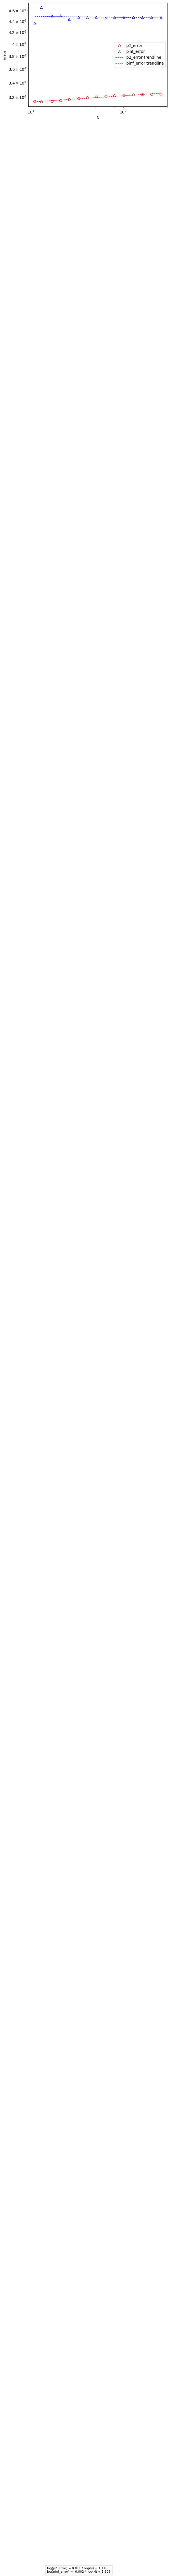

In [14]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error",marker='^')

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(15, .0001, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()